In [ ]:
import matplotlib.pyplot as plt
# We will need following libraries
import numpy as np
import pandas as pd

# Loading the ILPD dataset
df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")

print (f"No of samples: {df.shape[0]}. No of features in each sample: {df.shape[1]} .")
# Display the first  5 records
df.head()

No of samples: 582. No of features in each sample: 11 .


,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [ ]:
headings = ['Age','Gender','Total Bilirubin','Direct Bilirubin','Total Proteins','Albumin',
            'A/G ratio','SGPT','SGOT','Alkphos','Disease']
df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv", names = headings)
# The last column - 'Disease', contains the labels
df.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Total Proteins,Albumin,A/G ratio,SGPT,SGOT,Alkphos,Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df.shape # rows, columns of original dataset

(583, 11)

In [ ]:
df_duplicate = df[df.duplicated(keep = False)] # keep = False gives you all rows with duplicate entries
df_duplicate

,Age,Gender,Total Bilirubin,Direct Bilirubin,Total Proteins,Albumin,A/G ratio,SGPT,SGOT,Alkphos,Disease
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [ ]:
df = df[~df.duplicated(subset = None, keep = 'first')]
# Here, keep = 'first' ensures that only the first row is taken into the final dataset.
# The '~' sign tells pandas to keep all values except the 13 duplicate values
df.shape

(570, 11)

In [ ]:
print(df.isnull().sum()) # display number of null values by column

Age                 0
Gender              0
Total Bilirubin     0
Direct Bilirubin    0
Total Proteins      0
Albumin             0
A/G ratio           0
SGPT                0
SGOT                0
Alkphos             4
Disease             0
dtype: int64


Split the data into train and test at mentioned above

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
headings = ['Age','Gender','Total Bilirubin','Direct Bilirubin','Total Proteins','Albumin','A/G ratio','SGPT','SGOT','Alkphos','Disease']
df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv", names=headings)

# Encode gender variable as female -0 and male-1; encode class labels as 1 and 0
df['Gender'] = df['Gender'].apply(lambda x: 1 if x=='Male' else 0)
df['Disease'] = df['Disease'].apply(lambda x: 1 if x==1 else 0)

# Split into training and testing sets
X = df.iloc[:,:-1]  # Features/predictors
y = df.iloc[:, -1]  # Response variable/class labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
# Count the number of instances in each class for training and testing sets
train_class_dist = y_train.value_counts()
test_class_dist = y_test.value_counts()

print("Class distribution in training set:")
print(train_class_dist)

print("\nClass distribution in testing set:")
print(test_class_dist)

Class distribution in training set:
1    329
0    137
Name: Disease, dtype: int64

Class distribution in testing set:
1    87
0    30
Name: Disease, dtype: int64


**Plot classwise box plots for each predictor to study their discriminative power** 

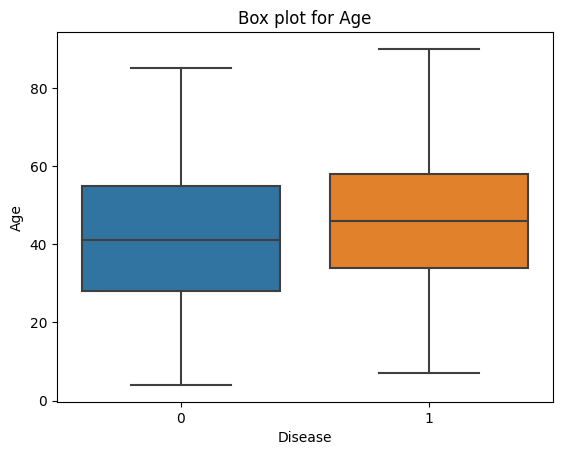

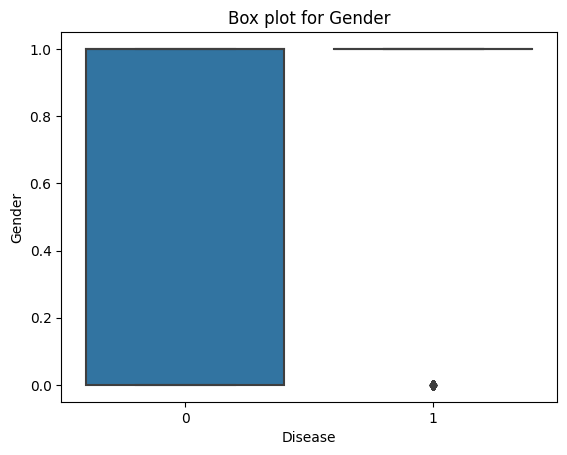

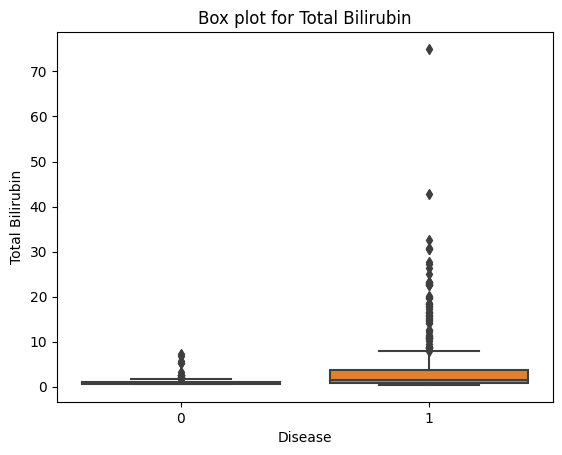

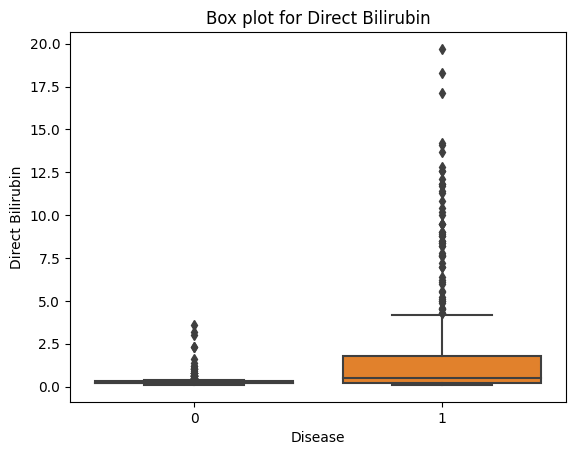

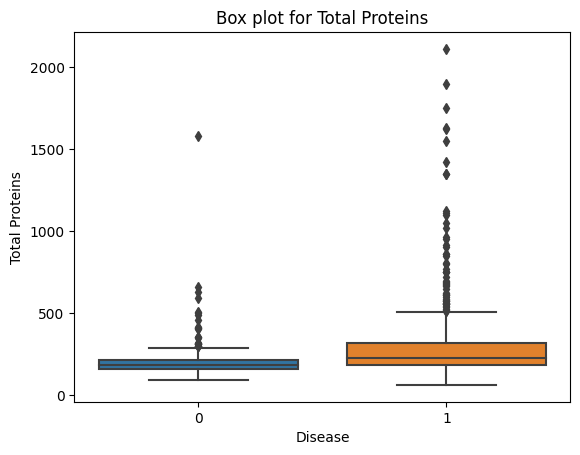

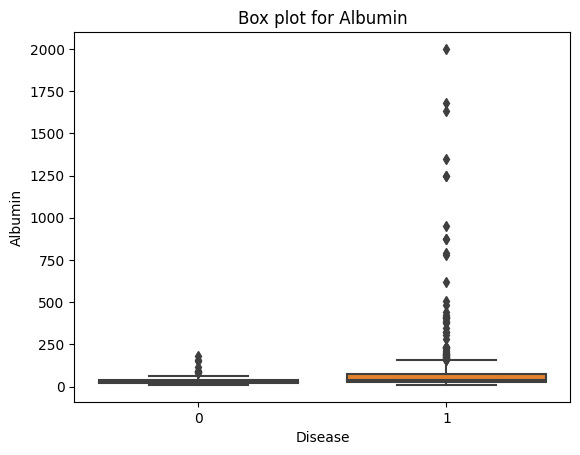

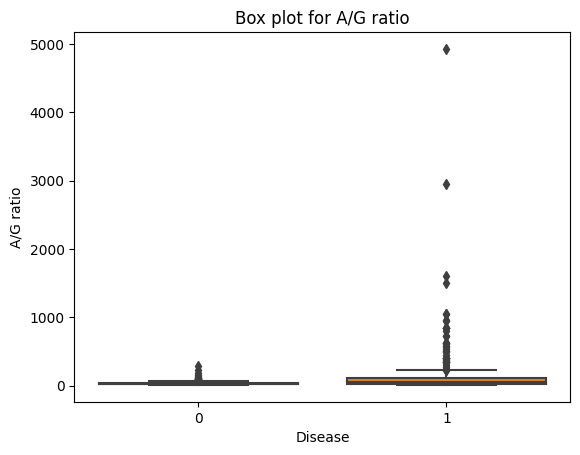

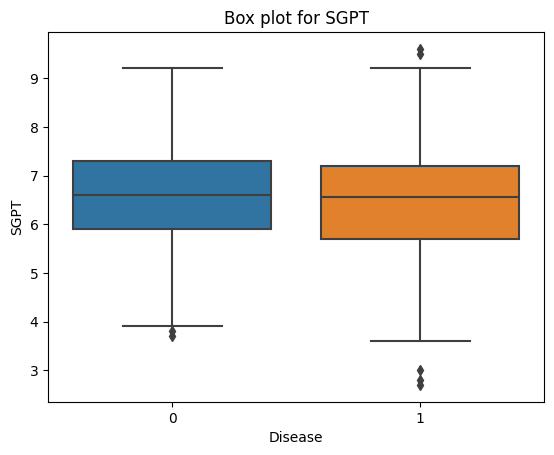

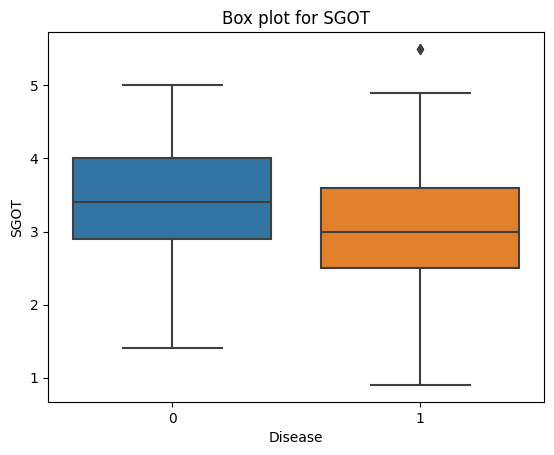

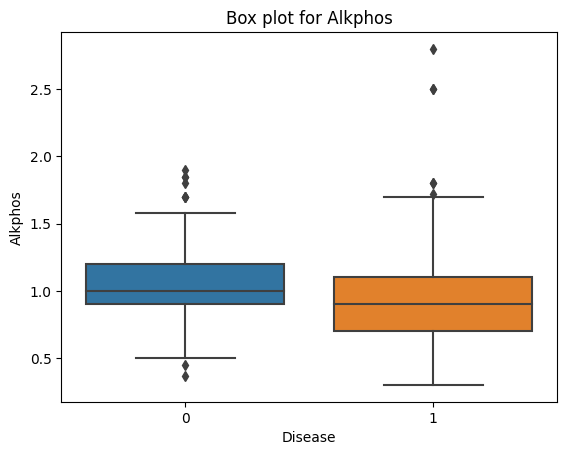

In [53]:
import matplotlib.pyplot as plt

# Create a list of the predictor variable names
predictors = ['Age','Gender','Total Bilirubin','Direct Bilirubin','Total Proteins','Albumin','A/G ratio','SGPT','SGOT','Alkphos']

# Group the data by DISEASE
grouped = df.groupby('Disease')

# Plot classwise box plots for each predictor
for predictor in df.columns[:-1]:
    plt.figure()
    sns.boxplot(x='Disease', y=predictor, data=df)
    plt.title('Box plot for ' + predictor)
plt.show()



In [5]:
df.dropna(inplace=True)


In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Impute missing values in train and test data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Fit logistic regression model to train data
lr = LogisticRegression(random_state=42)
lr.fit(X_train_imputed, y_train)

# Evaluate significance of model and regression coefficients
X_train_imputed_sm = sm.add_constant(X_train_imputed)
lr_imputed_sm = sm.Logit(y_train, X_train_imputed_sm)
result = lr_imputed_sm.fit()

# Display model summary output
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.502740
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Disease   No. Observations:                  466
Model:                          Logit   Df Residuals:                      455
Method:                           MLE   Df Model:                           10
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                  0.1700
Time:                        16:19:27   Log-Likelihood:                -234.28
converged:                       True   LL-Null:                       -282.25
Covariance Type:            nonrobust   LLR p-value:                 3.517e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9641      1.427     -2.778      0.005      -6.761      -1.167
x1             0.0151      0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer object with strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Impute missing values in train and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [13]:
# Fit logistic regression model on imputed train data
lr = LogisticRegression(random_state=42)
lr.fit(X_train_imputed, y_train)

# Make predictions on imputed train and test data
y_train_pred = lr.predict(X_train_imputed)
y_test_pred = lr.predict(X_test_imputed)

# Compute accuracy on imputed train and test data
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
X_train.feature_names = None
X_test.feature_names = None


In [22]:
from sklearn.impute import SimpleImputer

# Replace missing values with the mean of non-missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


Train accuracy: 0.7167381974248928
Test accuracy: 0.7435897435897436
The model is underfitting.


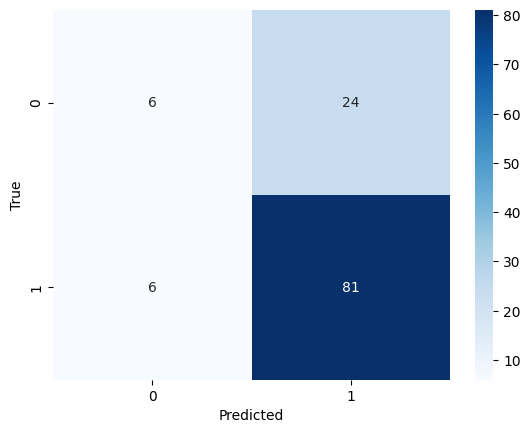

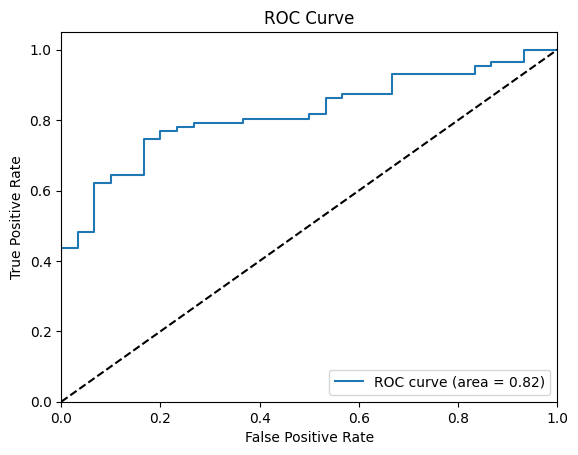

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize logistic regression model with feature names
lr = LogisticRegression(random_state=42, max_iter=10000, solver='liblinear', fit_intercept=True)
lr.fit(X_train, y_train)

# Make predictions on train and test data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate accuracy on train and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

# Determine if the model is overfitting, underfitting, or a good fit
if train_accuracy > test_accuracy:
    print("The model is overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is underfitting.")
else:
    print("The model is a good fit.")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot ROC curve
y_test_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Fit the model on train data
dt.fit(X_train, y_train)

# Make predictions on train and test data
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate accuracy on train and test data
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)


Train accuracy: 1.0
Test accuracy: 0.717948717948718


[Text(0.671875, 0.96875, 'x[3] <= 0.65\ngini = 0.415\nsamples = 466\nvalue = [137, 329]'),
 Text(0.512598167539267, 0.90625, 'x[4] <= 212.0\ngini = 0.482\nsamples = 291\nvalue = [118, 173]'),
 Text(0.381217277486911, 0.84375, 'x[4] <= 205.5\ngini = 0.5\nsamples = 189\nvalue = [93, 96]'),
 Text(0.28861256544502617, 0.78125, 'x[6] <= 26.5\ngini = 0.499\nsamples = 181\nvalue = [86, 95]'),
 Text(0.13481675392670156, 0.71875, 'x[6] <= 20.5\ngini = 0.493\nsamples = 77\nvalue = [43, 34]'),
 Text(0.060209424083769635, 0.65625, 'x[5] <= 13.0\ngini = 0.495\nsamples = 42\nvalue = [19, 23]'),
 Text(0.020942408376963352, 0.59375, 'x[8] <= 3.35\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.010471204188481676, 0.53125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.031413612565445025, 0.53125, 'x[4] <= 172.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.020942408376963352, 0.46875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.041884816753926704, 0.46875, 'gini = 0.0\nsamples

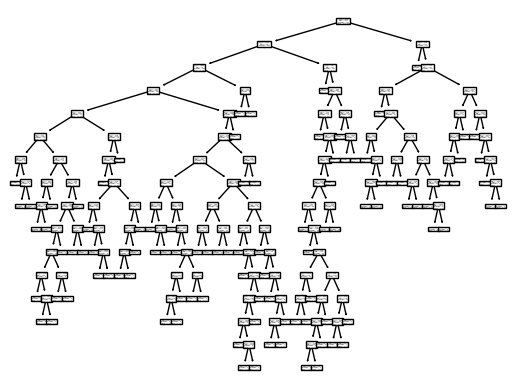

In [25]:
from sklearn.tree import plot_tree

plot_tree(dt)


In [26]:
from sklearn.tree import DecisionTreeClassifier

# Initialize decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Fit the model to the data
dt.fit(X_train, y_train)

# Get the height of the decision tree
tree_height = dt.tree_.max_depth
print(f"Tree height: {tree_height}")


Tree height: 15


In [38]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# Define the range of values for alpha
alphas = np.arange(0, 1.1, 0.1)

dt = DecisionTreeClassifier(random_state=42, criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0, max_features=None, max_leaf_nodes=None, ccp_alpha=0)


# Use GridSearchCV to find the best value of alpha
clf = GridSearchCV(estimator=dt, param_grid=dict(ccp_alpha=alphas), cv=10)
clf.fit(X_train, y_train)

# Print the best value of alpha
print("Best value of alpha:", clf.best_estimator_.ccp_alpha)

# Define parameter grid for grid search
param_grid = {
    'max_depth': range(2, 11),
    'min_samples_leaf': range(1, 6)
}

# Initialize decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Initialize grid search object with 10-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit grid search object to training data
grid_search.fit(X_train, y_train)

# Get best estimator from grid search object
best_dt = grid_search.best_estimator_

# Make predictions on train and test data
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

# Calculate and print train and test accuracy
train_acc = best_dt.score(X_train, y_train)
test_acc = best_dt.score(X_test, y_test)
print(f'Train accuracy: {train_acc}')
print(f'Test accuracy: {test_acc}')


Best value of alpha: 0.1
Train accuracy: 0.7124463519313304
Test accuracy: 0.7435897435897436


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

# Define the range of values for num_trees
num_trees_range = [10, 20, 30, 40, 50, 70, 100, 300, 500]

# Initialize decision tree model
dt = DecisionTreeClassifier(random_state=42, criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0, class_weight=None, ccp_alpha=0.0)

# Initialize lists to store mean accuracy scores for train and test data
train_scores = []
test_scores = []

for num_trees in num_trees_range:
    # Initialize bagging model with decision tree base estimator
    bagging = BaggingClassifier(base_estimator=dt, n_estimators=num_trees, random_state=42)
    
    # Perform 10-fold cross validation on bagging model
    train_cv_scores = cross_val_score(bagging, X_train, y_train, cv=10)
    
    # Append mean accuracy scores for train and test data
    train_scores.append(train_cv_scores.mean())
    bagging.fit(X_train, y_train)
    test_scores.append(bagging.score(X_test, y_test))

# Print the mean accuracy scores for train and test data for each value of num_trees
for i in range(len(num_trees_range)):
    print('num_trees: %d' % num_trees_range[i])
    print('Train accuracy: %f' % train_scores[i])
    print('Test accuracy: %f' % test_scores[i])


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

num_trees: 10
Train accuracy: 0.714940
Test accuracy: 0.752137
num_trees: 20
Train accuracy: 0.697919
Test accuracy: 0.769231
num_trees: 30
Train accuracy: 0.684921
Test accuracy: 0.760684
num_trees: 40
Train accuracy: 0.697595
Test accuracy: 0.743590
num_trees: 50
Train accuracy: 0.699722
Test accuracy: 0.735043
num_trees: 70
Train accuracy: 0.691119
Test accuracy: 0.752137
num_trees: 100
Train accuracy: 0.693154
Test accuracy: 0.735043
num_trees: 300
Train accuracy: 0.686772
Test accuracy: 0.752137
num_trees: 500
Train accuracy: 0.695421
Test accuracy: 0.743590


In [41]:
from sklearn.ensemble import AdaBoostClassifier

num_trees_range = [10, 20, 30, 40, 50, 70, 100, 300, 500]

# Initialize lists to store mean accuracy scores for train and test data
train_scores = []
test_scores = []

# Loop through range of num_trees values
for num_trees in num_trees_range:
    # Initialize decision tree model
    dt = DecisionTreeClassifier(random_state=42, criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0, class_weight=None, ccp_alpha=0.0)

    # Initialize AdaBoost model with decision tree base estimator
    adaboost = AdaBoostClassifier(base_estimator=dt, n_estimators=num_trees, random_state=42)

    # Calculate cross validation scores for train data
    train_cv_scores = cross_val_score(adaboost, X_train, y_train, cv=10)

    # Append mean score to train_scores list
    train_scores.append(np.mean(train_cv_scores))

    # Fit the AdaBoost model to the train data
    adaboost.fit(X_train, y_train)

    # Calculate accuracy scores for train and test data
    train_score = adaboost.score(X_train, y_train)
    test_score = adaboost.score(X_test, y_test)

    # Append scores to test_scores list
    test_scores.append(test_score)

    # Print results for this iteration
    print("num_trees:", num_trees)
    print("Train accuracy:", train_score)
    print("Test accuracy:", test_score)
    print()

# Find the index of the highest test score
best_idx = np.argmax(test_scores)

# Print the best num_trees value and its associated scores
print("Best num_trees:", num_trees_range[best_idx])
print("Train accuracy:", train_scores[best_idx])
print("Test accuracy:", test_scores[best_idx])


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

num_trees: 10
Train accuracy: 1.0
Test accuracy: 0.7008547008547008

num_trees: 20
Train accuracy: 1.0
Test accuracy: 0.7008547008547008

num_trees: 30
Train accuracy: 1.0
Test accuracy: 0.7008547008547008



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

num_trees: 40
Train accuracy: 1.0
Test accuracy: 0.7008547008547008

num_trees: 50
Train accuracy: 1.0
Test accuracy: 0.7008547008547008

num_trees: 70
Train accuracy: 1.0
Test accuracy: 0.7008547008547008



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

num_trees: 100
Train accuracy: 1.0
Test accuracy: 0.7008547008547008

num_trees: 300
Train accuracy: 1.0
Test accuracy: 0.7008547008547008

num_trees: 500
Train accuracy: 1.0
Test accuracy: 0.7008547008547008

Best num_trees: 10
Train accuracy: 0.6546253469010176
Test accuracy: 0.7008547008547008


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize lists to store mean accuracy scores for train and test data
train_acc_scores = []
test_acc_scores = []

num_trees_range = [10, 20, 30, 40, 50, 70, 100, 300, 500]
num_features_range = [1, 2, 3]

for num_trees in num_trees_range:
    for num_features in num_features_range:
        # Initialize random forest model
        rf = RandomForestClassifier(n_estimators=num_trees, max_features=num_features, random_state=42)

        # Perform 10-fold cross validation
        train_acc = cross_val_score(rf, X_train, y_train, cv=10).mean()
        test_acc = cross_val_score(rf, X_test, y_test, cv=10).mean()

        print(f"num_trees: {num_trees}, num_features: {num_features}")
        print(f"Train accuracy: {train_acc:.6f}")
        print(f"Test accuracy: {test_acc:.6f}")

        # Add mean accuracy scores to lists
        train_acc_scores.append(train_acc)
        test_acc_scores.append(test_acc)

# Find index of best parameter combination
best_idx = np.argmax(test_acc_scores)

# Extract corresponding parameter combination
best_num_trees = num_trees_range[best_idx // len(num_features_range)]
best_num_features = num_features_range[best_idx % len(num_features_range)]

print(f"Best parameter combination: num_trees={best_num_trees}, num_features={best_num_features}")

# Train random forest model with best parameter combination
rf = RandomForestClassifier(n_estimators=best_num_trees, max_features=best_num_features, random_state=42)
rf.fit(X_train, y_train)

# Evaluate performance on train and test data
train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)

print(f"Train accuracy: {train_acc:.6f}")
print(f"Test accuracy: {test_acc:.6f}")


num_trees: 10, num_features: 1
Train accuracy: 0.697687
Test accuracy: 0.717424
num_trees: 10, num_features: 2
Train accuracy: 0.674006
Test accuracy: 0.769697
num_trees: 10, num_features: 3
Train accuracy: 0.695097
Test accuracy: 0.733333
num_trees: 20, num_features: 1
Train accuracy: 0.688945
Test accuracy: 0.717424
num_trees: 20, num_features: 2
Train accuracy: 0.700093
Test accuracy: 0.786364
num_trees: 20, num_features: 3
Train accuracy: 0.686633
Test accuracy: 0.743182
num_trees: 30, num_features: 1
Train accuracy: 0.718964
Test accuracy: 0.725758
num_trees: 30, num_features: 2
Train accuracy: 0.695560
Test accuracy: 0.751515
num_trees: 30, num_features: 3
Train accuracy: 0.682424
Test accuracy: 0.717424
num_trees: 40, num_features: 1
Train accuracy: 0.701758
Test accuracy: 0.725758
num_trees: 40, num_features: 2
Train accuracy: 0.695421
Test accuracy: 0.760606
num_trees: 40, num_features: 3
Train accuracy: 0.682516
Test accuracy: 0.725758
num_trees: 50, num_features: 1
Train acc

In [45]:
from sklearn.preprocessing import MinMaxScaler

# create scaler object
scaler = MinMaxScaler()

# fit scaler on train data
scaler.fit(X_train)

# transform train and test data using scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Ridge logistic regression
ridge_logreg = LogisticRegression(penalty='l2', solver='saga', max_iter=10000)
ridge_params = {'C': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge_logreg, ridge_params, cv=10)
ridge_grid.fit(X_train_scaled, y_train)

print('Ridge Logistic Regression')
print('Best regularization parameter:', ridge_grid.best_params_['C'])

ridge_train_acc = accuracy_score(y_train, ridge_grid.predict(X_train_scaled))
ridge_test_acc = accuracy_score(y_test, ridge_grid.predict(X_test_scaled))
print('Train accuracy:', ridge_train_acc)
print('Test accuracy:', ridge_test_acc)

# LASSO logistic regression
lasso_logreg = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
lasso_params = {'C': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso_logreg, lasso_params, cv=10)
lasso_grid.fit(X_train_scaled, y_train)

print('LASSO Logistic Regression')
print('Best regularization parameter:', lasso_grid.best_params_['C'])

lasso_train_acc = accuracy_score(y_train, lasso_grid.predict(X_train_scaled))
lasso_test_acc = accuracy_score(y_test, lasso_grid.predict(X_test_scaled))
print('Train accuracy:', lasso_train_acc)
print('Test accuracy:', lasso_test_acc)


Ridge Logistic Regression
Best regularization parameter: 100
Train accuracy: 0.7188841201716738
Test accuracy: 0.7606837606837606
LASSO Logistic Regression
Best regularization parameter: 100
Train accuracy: 0.723175965665236
Test accuracy: 0.7692307692307693


In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Initialize k range for hyperparameter tuning
k_range = list(range(1, 31))

# Cross-validation to find best value of k
cv_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Determine best value of k
best_k = k_range[cv_scores.index(max(cv_scores))]
print("Best value of k:", best_k)

# Train and evaluate KNN model with best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
train_acc = knn.score(X_train_scaled, y_train)
test_acc = knn.score(X_test_scaled, y_test)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)


Best value of k: 23
Train accuracy: 0.7103004291845494
Test accuracy: 0.7521367521367521


In [48]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# create LinearSVC model
svm = LinearSVC(loss='hinge')

# define grid of hyperparameters to search over
param_grid = {'C': [2**-3, 2**-1, 2**0, 2**1, 2**3]}

# create GridSearchCV object
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=10)

# fit the model on scaled train data
grid_search.fit(X_train_scaled, y_train)

# get the best value of C from the cross-validation
best_C = grid_search.best_params_['C']

# train the model on scaled train data with the best C value
svm = LinearSVC(loss='hinge', C=best_C)
svm.fit(X_train_scaled, y_train)

# predict on train and test data
y_train_pred = svm.predict(X_train_scaled)
y_test_pred = svm.predict(X_test_scaled)

# calculate accuracy on train and test data
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# print train and test accuracy
print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Train accuracy: 0.7060085836909872
Test accuracy: 0.7435897435897436


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# define the parameter grid for the grid search
param_grid = {'C': [2**-3, 2**-1, 20, 21, 23],
              'gamma': [2**-5, 2**-3, 2**-1, 20, 21, 23]}

# define the RBF kernel Soft margin SVM classifier model
svm_rbf = SVC(kernel='rbf')

# perform 10-fold cross-validation to find the best hyperparameters
svm_rbf_cv = GridSearchCV(svm_rbf, param_grid, cv=10)
svm_rbf_cv.fit(X_train_scaled, y_train)

# print the best hyperparameters found
print("Best hyperparameters: ", svm_rbf_cv.best_params_)

# evaluate performance on train and test data
train_acc = svm_rbf_cv.score(X_train_scaled, y_train)
test_acc = svm_rbf_cv.score(X_test_scaled, y_test)
print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)


Best hyperparameters:  {'C': 0.125, 'gamma': 0.03125}
Train accuracy: 0.7060085836909872
Test accuracy: 0.7435897435897436
